# Generator Program für:

> Jens Spille  
> 2020 April/Mai


- ADFC-Map.html
- maengel.md
- GPSOutput\maengel.gpx

Als Datenquelle dient: Maengelliste.xlsx

### Läuft unter Anaconda

### Notwendige Installationspakete

> Run Anaconde Prompt with Admin Rights

- Install ipyleaflet 
    - help https://ipyleaflet.readthedocs.io/en/latest/index.html
    - conda install -c conda-forge ipyleaflet 
- Install "pip install openlocationcode"
    - pip install openlocationcode
- Install "conda install gpxpy"
    - conda install -c conda-forge gpxpy

# Create base map for Hemmingen
Tipps: ScaleControl is not compatible with embed_html

In [1]:
import unittest
tc = unittest.TestCase()

from ipyleaflet import basemaps

def mapselection(i):
    switcher={
                0:basemaps.OpenStreetMap.Mapnik,
                1:basemaps.Esri.WorldImagery,
             }
    return switcher.get(i,"Invalid value of mapselection")

#test
tc.assertEqual(mapselection(2),"Invalid value of mapselection")

In [2]:
# Create Map
from ipyleaflet import Map, FullScreenControl, LayersControl

center = (52.30, 9.73)
zoom = 13
basemap = mapselection(1) 

m = None
m = Map(basemap=basemap,center=center, zoom=zoom, scroll_wheel_zoom=True)
m.layout.height='800px'
m.layout.width='800px'

# add controls
m.add_control(FullScreenControl(position='topleft'))
m.add_control(LayersControl(position='topleft'))

In [3]:
from ipyleaflet import basemap_to_tiles

satellit = basemap_to_tiles(basemaps.OpenStreetMap.Mapnik)
m.add_layer(satellit)

m

Map(center=[52.3, 9.73], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

# Load and show Borders

In [4]:
## Read all Border files
from os import listdir
from os.path import isfile, join

GrenzPath = 'Grenzen'

Grenzfiles = [join(GrenzPath,f) for f in listdir(GrenzPath) if isfile(join(GrenzPath, f))]
Grenzfiles

['Grenzen\\Hemmingen.gpx', 'Grenzen\\Pattensen.gpx']

In [5]:
import re
def getfilename(filepath):
    match = re.search('\\\\(.+?)\.', filepath)
    if match:
        filename = match.group(1)
    else:
        filename = ""
    return filename

#test
tc.assertEqual(getfilename('path\\name.ext'),'name')

In [6]:
import gpxpy
import gpxpy.gpx

def getpositions(filename):
    gpxfilefp = open(filename, 'r', encoding='utf-8-sig') #use sig if file has Byte Order Mark (BOM)
    gpx = gpxpy.parse(gpxfilefp)
    gpxfilefp.close()
    return [[i.latitude, i.longitude] for i in gpx.tracks[0].segments[0].points]

In [7]:
# make border lines with popup text

from ipyleaflet import Polyline
from ipywidgets import HTML
from ipyleaflet import MarkerCluster

grenzliste = []
for filepath in Grenzfiles:
    print(filepath)

    line = Polyline(
        name = 'Grenzen',
        locations=getpositions(filepath),
        color="orange",
        opacity = 0.5,
        weight = 5,
        fill=False
    )
    
    Poptext = HTML()
    Poptext.value = getfilename(filepath)
    line.popup = Poptext

    grenzliste.append(line)
    
GrenzenCluster = MarkerCluster(name = 'Grenzverläufe', markers= grenzliste)
m.add_layer(GrenzenCluster);

m

Grenzen\Hemmingen.gpx
Grenzen\Pattensen.gpx


Map(center=[52.3, 9.73], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

# ADFC Icon and FSW Location

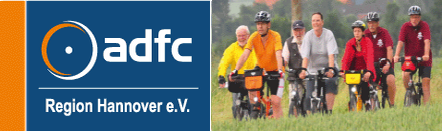

In [8]:
# define Logo

from IPython.display import Image

from ipyleaflet import Icon, Marker

LogoPos = (52.326298, 9.676757)
Logo = Icon(icon_url='img\ADFCLogo.png', icon_size=[120, 40])
markIcon = Marker(name='Icon',location=LogoPos, icon=Logo)

Image(filename=Logo.icon_url) 

In [9]:
# define Marker (Gear)
from ipyleaflet import AwesomeIcon, Marker

locFSW = (52.319109, 9.723495)

# icon
iconGear = AwesomeIcon(
    name='gear',
    marker_color='blue',
    icon_color='darkred',
    spin=True
)

markerFSW = Marker( icon=iconGear, 
                    draggable= False,
                    location=locFSW,
                    title = 'klick mich')

# Popup Window
htmlFSW = HTML()
htmlFSW.value = '''<a href="http://adfc-hemmingen-pattensen.github.io/" 
                    target="_blank">ADFC Selbsthilfe-Werkstatt</a>'''
markerFSW.popup = htmlFSW

In [10]:
# add Logo & Marker to Cluster

ADFC_cluster = MarkerCluster(
    name = 'ADFC Info',
    markers=(markerFSW, 
             markIcon)
)

m.add_layer(ADFC_cluster);
    
m

Map(center=[52.3, 9.73], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

# Verbingungswünsche

pass GPX file

In [11]:
## Read all Route file
from os import listdir
from os.path import isfile, join

WunschPath = 'Maengel'

wunschfiles = [join(WunschPath,f) for f in listdir(WunschPath) if isfile(join(WunschPath, f))]

print(len(wunschfiles))
print(wunschfiles)

28
['Maengel\\7M9R+3Xtrk.gpx', 'Maengel\\7PPR+3Ctrk.gpx', 'Maengel\\7PVG+Q8trk.gpx', 'Maengel\\8P3H+3Htrk.gpx', 'Maengel\\8P5P+FRtrk.gpx', 'Maengel\\8P78+49trk.gpx', 'Maengel\\8P7G+GJtrk.gpx', 'Maengel\\8P7H+45trk.gpx', 'Maengel\\8P9M+W2trk.gpx', 'Maengel\\8PGV+4Ctrk.gpx', 'Maengel\\8PJM+VWtrk.gpx', 'Maengel\\8Q5G+F7trk.gpx', 'Maengel\\8Q77+69trk.gpx', 'Maengel\\8QF4+62trk.gpx', 'Maengel\\Karte01trk.gpx', 'Maengel\\Karte02trk.gpx', 'Maengel\\Karte03trk.gpx', 'Maengel\\Karte04trk.gpx', 'Maengel\\Karte05trk.gpx', 'Maengel\\Karte06trk.gpx', 'Maengel\\Karte07trk.gpx', 'Maengel\\Karte08trk.gpx', 'Maengel\\Karte09trk.gpx', 'Maengel\\Karte10trk.gpx', 'Maengel\\Karte11trk.gpx', 'Maengel\\Karte12trk.gpx', 'Maengel\\Karte13trk.gpx', 'Maengel\\Karte14trk.gpx']


In [12]:
# Add Wunschverbindugen
wuensche = []
for filepath in wunschfiles:

    line = Polyline(
        name = 'Wunschverbindungen',
        locations=getpositions(filepath),
        color="red",
        weight =3,
        fill=False
    )
  
    Poptext = HTML()
    Poptext.value = getfilename(filepath)
    line.popup = Poptext

    wuensche.append(line)

WunschCluster = MarkerCluster(name = 'Wunschverbindugen', markers= wuensche)
m.add_layer(WunschCluster);

m

Map(center=[52.3, 9.73], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

# Load Excel as dataframe

In [13]:
import pandas as pd

df = pd.read_excel(r'Maengelliste.xlsx', sheet_name='Sheet1', skiprows=5, header=0)
df.tail()

,PlusCode,GoogleMapLink,Titel,Einstelldatum,Informationsquelle,Ortsbeschreibung,Mangel,Maßnahmenvorschlag,Status,Links,...,R10,B3 alt,Dorfstr.,Allg.,Google Koordinaten\nhttps://www.google.de/maps,latitude\nohne\nOffset,Offset,Name,latitude,longitude
243,7Q64+F9,7Q64+F9,Radweg zur KGS - In Planung,2019-03-26 00:00:00,ADFC,Zwischen Dammstraße und KGS,siehe [HAZ Artikel](7Q64+F9_2019-03-26 HAZ Pat...,Radweg bauen,- 2019-09-27-Fr - J. Spille - Bau verzögert si...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,7Q87+6P,7Q87+6P,Radwegführung Göttinger Straße - Ein Hin und H...,2019-09-22 00:00:00,In Gespräch mit Grünen,Pattensen - Göttinger Straße,Plenergy Sommer 2019: Die Schüler der KGS hatt...,siehe: Semesterarbeit der Studenten der HAWK H...,- 2019-03-11 Unsere Email an Frau Schumann\n- ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,7RG4+R6,7RG4+R6,B443 - Starke Bodenwelle durch Wurzelwuchs,2018-11-27 00:00:00,ADFC,B443 - Brücke über Leine,Starke Bodenwelle durch Wurzelwuchs,Ausbesserung,Status 2018-11-27 J. Spille: Der Mangel ist sc...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,7RP3+H8,7RP3+H8,Brücke bei Wasserwerk Grassdorf - Hoher Absatz...,2018-11-27 00:00:00,ADFC,Brücke bei Wasserwerk Grassdorf,Die Zufahrt auf die Brücke hat auf beiden Seit...,Status 2018-11-27 J. Spille: Welche Stadt ist ...,- offen,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Decode Open Location Code
https://plus.codes/

In [14]:
css = """
<style>
h1 {
  font-weight: bold;
  color: #000;
  font-size: 14px;
}

h2 {
  font-weight: bold;
  color: #000;
  font-size: 13px;
}
h3 {
  font-weight: bold;
  color: #000;
  font-size: 12px;
}
</style>
"""

In [15]:
# generate Hash code
import hashlib

def generateHash(RawTitel):
    hash_object = hashlib.md5(RawTitel.encode())
    return hash_object.hexdigest()

#test
tc.assertEqual(generateHash('Hello World'),'b10a8db164e0754105b7a99be72e3fe5')

In [16]:
import urllib.parse

def buildMarkdownText(df,i):
    plusCode = str(df.loc[i,'PlusCode'])
    RawTitel = str(df.loc[i,'Titel'])
    
    anchorcode = generateHash(RawTitel)
 
    anchor = '<a name="{}"></a>\n\n'.format(anchorcode)
    TextTitel = "# {}\n\n".format(RawTitel)
    if type(TextTitel) != str:
        TextTitel =  '*Kein Titel vorhanden*\n\n'
    
    BaseURL = "https://adfc-hemmingen-pattensen.github.io/MaengelKarte/index.html"
    GMapURL = "https://www.google.com/maps/search/?api=1&query=9F4F{}%2B{}".format(plusCode[:4],plusCode[-2:])
    TextPlusCode = "- Plus Code: [{}]({})\n".format(plusCode,GMapURL)

    Mängelliste = '- Mängelliste: <a href={} target="_blank">Link</a>\n'.format(BaseURL+'#'+anchorcode)
      
    Einstelldatum = "- Einstelldatum: {}\n".format(str(df.loc[i,'Einstelldatum'])[:10])
    Informationsquelle = "- Informationsquelle: {}\n".format(str(df.loc[i,'Informationsquelle']))
    Ortsbeschreibung = "\n### Ortsbeschreibung:\n\n {}\n".format(str(df.loc[i,'Ortsbeschreibung']))
    Mangel = "\n### Mangel:\n\n {}\n".format(str(df.loc[i,'Mangel']))
    Maßnahmenvorschlag = "\n### Maßnahmenvorschlag:\n\n {}\n".format(str(df.loc[i,'Maßnahmenvorschlag']))
    Status = "\n### Status:\n\n {}\n".format(str(df.loc[i,'Status']))
    hr = "\n---\n"
    
    return( anchor
           +TextTitel
           +TextPlusCode
           +Mängelliste
           +Einstelldatum
           +Informationsquelle
           +Ortsbeschreibung
           +Mangel
           +Maßnahmenvorschlag
           +Status
           +hr
          ) 

In [17]:
### Create GPX Waypoint file <== New 2020-05-16-Sa JSp

def CreateGPXfile(gpx, gpxfilefp,coor,short, mdText):
    wpt = gpxpy.gpx.GPXWaypoint(latitude = coor.latitudeCenter,longitude=coor.longitudeCenter)
    wpt.description = mdText
    wpt.name = short+'_'+randomString(5)
    gpx.waypoints.append(wpt)
    return gpx

In [18]:
import random
import string

def randomString(stringLength=8):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))


In [19]:
# extract and convert 1st row  - openlocationcode 

from openlocationcode import openlocationcode as olc
from markdown import markdown

regexMarkdownImg = re.compile(r"!\[(.*?)\]\((.*?)\)", re.IGNORECASE) #https://www.regexpal.com/95855

icon = Icon(icon_url='img\pin_red.png', 
            icon_size=[281/15,641/15], 
            icon_anchor=[281/30,641/15])

AnzahlMarkers = len(df['PlusCode'])
print('Anzahl der Mängel {0}'.format(AnzahlMarkers))

allMDdescriptions = ""

fname = r"GPSOutput/maengel.gpx"
gpxfilefp = open(fname, 'w', encoding='utf-8-sig') #use sig if file has Byte Order Mark (BOM)
gpx = gpxpy.gpx.GPX()

markerMaengel = []
for i in range(0,AnzahlMarkers):

    # read OLC
    short = str(df.loc[i,'PlusCode'])[:7]
    if olc.isValid(short): 
        
        mdText = buildMarkdownText(df,i)
        
        subMDimg = r'![\1](img\\\2)'
        allMDdescriptions += regexMarkdownImg.sub(subMDimg, mdText)+"\n"
        
        # replace md img with html img and use width
        subHTMLimg = r'<img src="https://adfc-hemmingen-pattensen.github.io/MaengelKarte/img/\2" width="300">'
        mdTextPopUp = regexMarkdownImg.sub(subHTMLimg, mdText)
        
        htmlDescription = HTML()
        htmlDescription.value = css+'<div>'+markdown(mdTextPopUp)+'</div>'
        
        # convert OLC to Lat,Lon
        long = olc.recoverNearest(short, 52.30, 9.73)
        coor = olc.decode(long)
        pos =(coor.latitudeCenter, coor.longitudeCenter)
        
        markerMangel = Marker(title="klick",
                              location=pos, 
                              icon=icon, 
                              draggable=False, 
                              rotation_angle=20, 
                              rotation_origin='bottom center'
                              )
        
        markerMangel.popup = htmlDescription
        ## check https://ipyleaflet.readthedocs.io/en/latest/api_reference/popup.html
        markerMangel.popup_min_width = 500
        markerMangel.popup_max_height = 500

        markerMaengel.append(markerMangel)
        
        gpx = CreateGPXfile(gpx, gpxfilefp,coor,short, mdText)
        
    else:
        print(i+7, end=" ")

f = open('maengel.md', 'w',encoding='utf8')
f.write(allMDdescriptions)
f.close()

gpxfilefp.write(gpx.to_xml())
gpxfilefp.close()
        
MaengelCluster = MarkerCluster(name = 'Maengel', markers= markerMaengel)

m.add_layer(MaengelCluster);
    
m

Anzahl der Mängel 248
184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 254 

Map(center=[52.3, 9.73], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [20]:
## Read all Route file
from os import listdir
from os.path import isfile, join

RoutenPath = 'Routen'

onlyfiles = [join(RoutenPath,f) for f in listdir(RoutenPath) if isfile(join(RoutenPath, f))]
onlyfiles

['Routen\\Route01.gpx',
 'Routen\\Route02.gpx',
 'Routen\\Route03.gpx',
 'Routen\\Route04.gpx',
 'Routen\\Route05.gpx',
 'Routen\\Route06.gpx',
 'Routen\\Route07.gpx',
 'Routen\\Route08.gpx',
 'Routen\\Route09.gpx',
 'Routen\\Route10.gpx']

In [21]:
from ipyleaflet import  AntPath
import gpxpy
import gpxpy.gpx

Routen = []
for file in onlyfiles:
    gpxfilefp = open(file, 'r', encoding='utf-8-sig') #use sig if file has Byte Order Mark (BOM)
    gpx = gpxpy.parse(gpxfilefp)

    data = [[i.latitude, i.longitude] for i in gpx.tracks[0].segments[0].points]

    match = re.search('\\\\(.+?)\.', file)
    if match:
        found = match.group(1)
        
    ant_path = AntPath(
        name = found,
        title = found,
        locations=data,
        dash_array=[1, 10],
        delay=1000,
        color='#7590ba',
        pulse_color='#3f6fba'
    )

        
    Poptext = HTML()
    Poptext.value = found
    ant_path.popup = Poptext

    m.add_layer(ant_path)

m

Map(center=[52.3, 9.73], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

# Save as HTML and show in Browser
#https://ipywidgets.readthedocs.io/en/latest/embedding.html#python-interface

In [22]:
from ipywidgets.embed import embed_minimal_html #, dependency_state

embed_minimal_html('ADFC-Map.html', views=[m], title='ADFC Hem/Pat Karte')

# Start browser
!c:\DataADFC\adfc-github\adfc-hemmingen-pattensen.github.io\MaengelKarte\ADFC-Map.html